In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 30 Lecture 1 Assignment

In this assignment, we will build our first random forest model. We will use a dataset containing churn information for a telephone company's customers.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

# !pip install category_encoders
from category_encoders import LeaveOneOutEncoder

<IPython.core.display.Javascript object>

Read in the telecom churn dataset.

https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/telecom_churn.csv

In [21]:
# answer here
data_url = "https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/telecom_churn.csv"

df = pd.read_csv(data_url)

<IPython.core.display.Javascript object>

In [16]:
df["Churn"]

0        Yes
1        Yes
2         No
3         No
4        Yes
        ... 
51042    Yes
51043     No
51044    Yes
51045     No
51046     No
Name: Churn, Length: 51047, dtype: object

<IPython.core.display.Javascript object>

In [17]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


<IPython.core.display.Javascript object>

Perform the following preprocessing steps:

- This dataset has many columns; identify a subset of 10-15 features that you think could affect a customer's propensity to churn (also called "customer loss" or "customer attrition"). Include at least 1 categorical variable.
- Drop all rows that containing any missing values (this should be a fairly small number of rows)
- Convert the response from a string to a binary 1-0 encoding.

In [22]:
# answer goes here
df = df.dropna()


df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

<IPython.core.display.Javascript object>

In [6]:
df.dtypes

CustomerID                     int64
Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
H

<IPython.core.display.Javascript object>

In [33]:
x_cols = [
    "IncomeGroup",
    "MonthlyRevenue",
    "MonthlyMinutes",
    "TotalRecurringCharge",
    "OverageMinutes",
    "AgeHH1",
    "MonthsInService",
    "RespondsToMailOffers",
    "OptOutMailings",
    "RetentionCalls",
    "AdjustmentsToCreditRating",
]

<IPython.core.display.Javascript object>

In [25]:
df["Churn"] = df["Churn"] == "Yes"
df["Churn"] = df["Churn"].astype(int)

<IPython.core.display.Javascript object>

Although some implementations of tree-based models support categorical variables directly, scikit-learn's implementation does not, so we will need to convert our categorical variable(s) into numbers. In linear regression, we used one-hot/dummy encoding, but this has drawbacks that can be particularly problematic in the context of trees. Namely, dummy encoding can lead to very sparse columns when dealing with high-dimensional categorical features; the tree treats these levels as indepedent features is very unlikely to make a split on any of the individual levels, since the corresponding columns consist almost entirely consist of a single value.

Ideally, we would consider all of the levels simultaneously, which trees can do efficiently. However, sklearn does not implement this efficient algorithm for splitting on categorical variables. In this situation, a better alternative to dummy encoding is leave-one-out-encoding. This transforms each categorical into its conditional probability of the positive class, excluding the observation itself to avoid potential data leakage. Perform the following steps:

- Create an 80-20 train/test split on the data
- Fit a leave-one-out encoder to the training data and encode the categorical variables in the training data. The category_encoders package is helpful for this task. (Note that this ordering is important; if we fitted the encoder to the full dataset before making the train/test split, we would introduce data leakage by allowing the test data to affecting the estimates of the category-conditional probabilities.)

In [36]:
# answer goes here
X = df[x_cols]
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

cat_cols=['RespondsToMailOffers', 'OptOutMailings']



<IPython.core.display.Javascript object>

In [37]:
encoder = LeaveOneOutEncoder(cols=cat_cols)
encoder.fit(X_train, y_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

<IPython.core.display.Javascript object>

Next, fit the random forest model. You can tinker with or tune the parameters if you like, although we will use the default parameter values.

In [62]:
# answer goes here
model = RandomForestClassifier(min_samples_leaf = 20)
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<IPython.core.display.Javascript object>

In [63]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"train_score: {train_score}")
print(f"test_score: {test_score}")

train_score: 0.7299314087585739
test_score: 0.7137976082805748


<IPython.core.display.Javascript object>

To evaluate our model, produce the predicted values for the test sample. Remember to apply our previously fitted encoder to the test data prior to making predictions.

In [44]:
# answer goes here
y_pred = model.predict(X_test)




<IPython.core.display.Javascript object>

After making the predictions, print out the classification report (sklearn.metrics.classification_report). In addition, plot the confusion matrix and ROC curve. How did our model perform?

In [45]:
# answer goes here
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.72      0.94      0.81      7034
           1       0.44      0.12      0.19      2917

    accuracy                           0.70      9951
   macro avg       0.58      0.53      0.50      9951
weighted avg       0.64      0.70      0.63      9951



<IPython.core.display.Javascript object>

In [46]:
confusion_matrix(y_test, y_pred)

array([[6599,  435],
       [2573,  344]], dtype=int64)

<IPython.core.display.Javascript object>

In [52]:
y_prob = model.predict_proba(X_test)
y_prob[:,1]

array([[0.86, 0.14],
       [0.71, 0.29],
       [0.73, 0.27],
       ...,
       [0.77, 0.23],
       [0.69, 0.31],
       [0.87, 0.13]])

<IPython.core.display.Javascript object>

In [54]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])

<IPython.core.display.Javascript object>

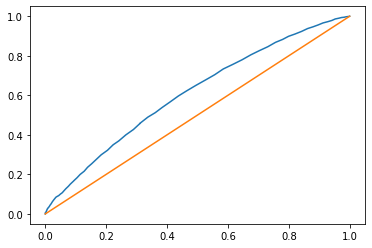

<IPython.core.display.Javascript object>

In [59]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

Print the feature importances, ordered by importance from high to low. What is the default sklearn feature importance metric?

In [64]:
# answer goes here

model.feature_importances_

feat_imp = pd.DataFrame(
    {"feat": X_train.columns, "importance": model.feature_importances_}
)
feat_imp.sort_values("importance", ascending=False)

,feat,importance
6,MonthsInService,0.246315
2,MonthlyMinutes,0.212534
1,MonthlyRevenue,0.167542
3,TotalRecurringCharge,0.102013
4,OverageMinutes,0.097077
5,AgeHH1,0.083199
0,IncomeGroup,0.055443
9,RetentionCalls,0.018118
7,RespondsToMailOffers,0.013993
10,AdjustmentsToCreditRating,0.003342


<IPython.core.display.Javascript object>